In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
a = os.getcwd()
print(a)

/Users/kumarmayank


In [4]:
working = a + "/data/data.csv"
print(working)

/Users/kumarmayank/data/data.csv


In [5]:
df = pd.read_csv(working)

In [6]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [11]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-04-13 16:13:09.989455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Drop the 'Unnamed: 32' column
# Encode the target variable 'diagnosis'
x = df.iloc[:,2:].values
y = df.iloc[:,1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape = (30,)))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense( 1 , activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

2023-04-13 16:18:49.576898: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-13 16:18:49.578695: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train the model on the training set
model.fit(X_train, y_train, batch_size = 100, epochs = 150)

Epoch 1/150


2023-04-13 16:19:26.214122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 72ms/step - loss: 0.5711 - accuracy: 0.7582
Epoch 2/150
5/5 [==============================] - 0s 24ms/step - loss: 0.5308 - accuracy: 0.7956
Epoch 3/150
5/5 [==============================] - 0s 22ms/step - loss: 0.4697 - accuracy: 0.8527
Epoch 4/150
5/5 [==============================] - 0s 21ms/step - loss: 0.4523 - accuracy: 0.8637
Epoch 5/150
5/5 [==============================] - 0s 20ms/step - loss: 0.3987 - accuracy: 0.8791
Epoch 6/150
5/5 [==============================] - 0s 21ms/step - loss: 0.3670 - accuracy: 0.8967
Epoch 7/150
5/5 [==============================] - 0s 20ms/step - loss: 0.3273 - accuracy: 0.8989
Epoch 8/150
5/5 [==============================] - 0s 21ms/step - loss: 0.3214 - accuracy: 0.8945
Epoch 9/150
5/5 [==============================] - 0s 21ms/step - loss: 0.2924 - accuracy: 0.9165
Epoch 10/150
5/5 [==============================] - 0s 20ms/step - loss: 0.2714 - accuracy: 0.9209
Epoch 11/150
5/5 [=============

2023-04-13 16:20:18.974439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 13ms/step


<Axes: >

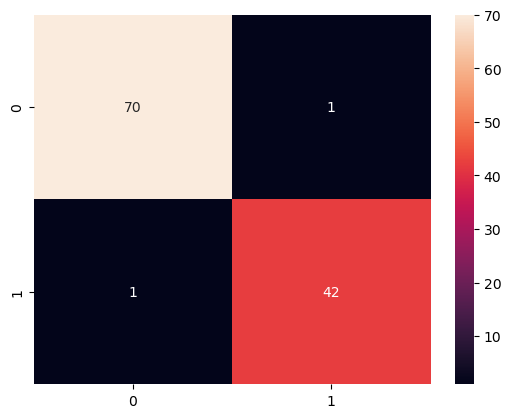

In [17]:
# Predict on the test set and calculate confusion matrix
pred = model.predict(X_test)
pred = (pred > 0.5)
cm = confusion_matrix(y_test,pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True)